In [122]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, glm
import pandas as pd
import seaborn as sns

In [123]:
df = pd.read_excel("data_raket.xlsx")
df = df.rename(columns={'test':'test', 'doel snelheid (in knopen)':'doel', 'resultaat (0=mis 1=raak)':'resultaat'}).copy()
df.head()

,test,doel,resultaat,laag,hoog
0,1,400,0,0.087783,0.584570
1,2,210,1,0.621714,0.985459
2,3,490,0,0.008746,0.389691
3,4,220,1,0.602198,0.981017
4,5,500,0,0.006627,0.372296


In [124]:
df = df.sort_values(by='doel')

In [150]:
model = logit("resultaat ~ doel", data=df).fit()
df['predict'] = model.predict()

model.params.values

linmodel_f = lambda x:model.params.values[0] + model.params.values[1]*x

Optimization terminated successfully.
         Current function value: 0.410194
         Iterations 6


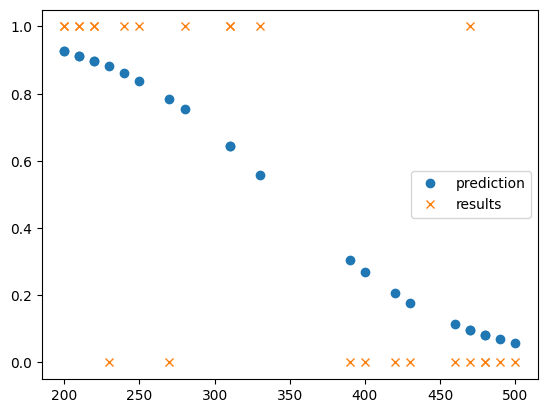

In [126]:
plt.plot(df['doel'], model.predict(), 'o', label='prediction')
plt.plot(df['doel'], df['resultaat'], 'x', label='results')
plt.legend()

In [127]:
x_pred = np.arange(np.min(df['doel']), np.max(df['doel']), 0.1)
x_pred
X_pred = sm.add_constant(x_pred)

In [128]:
x = np.array(df['doel'])
X = sm.add_constant(x)
y = df['resultaat']


model = sm.Logit(y, X).fit()
proba = model.predict(X_pred)

Optimization terminated successfully.
         Current function value: 0.410194
         Iterations 6


In [142]:
cov = model.cov_params()
gradient = (
    proba * (1 - proba) * X_pred.T
).T  # matrix of gradients for each observation
std_errors = np.array(
    [np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient]
)
c = 2.0 # multiplier for confidence interval
upper = proba + std_errors * c
lower = proba - std_errors * c

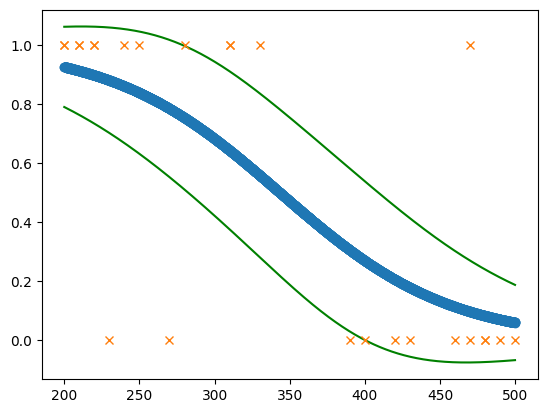

In [143]:
plt.plot(x_pred, proba, 'o')
plt.plot(x_pred, upper, '-g')
plt.plot(x_pred, lower, 'g-')
plt.plot(x, y, 'x')

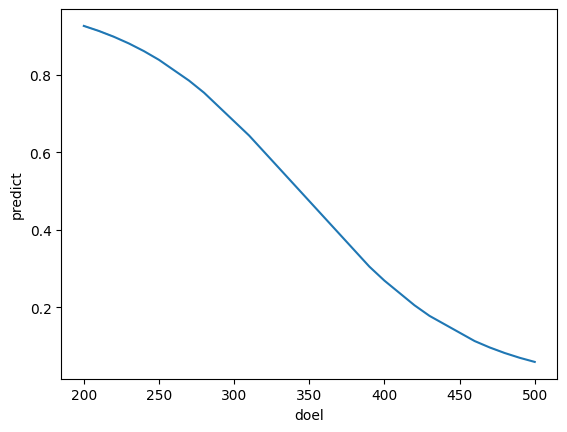

In [141]:
g = sns.lineplot(x='doel', y='predict', data=df, errorbar=('sd', 1.96))

In [153]:
snelheid = np.linspace(min(df['doel']), max(df['doel']), 100)

lin = linmodel_f(snelheid)

In [155]:
lin_data = pd.DataFrame({'snelheid':snelheid, 'prediction':lin})

<Axes: xlabel='snelheid', ylabel='prediction'>

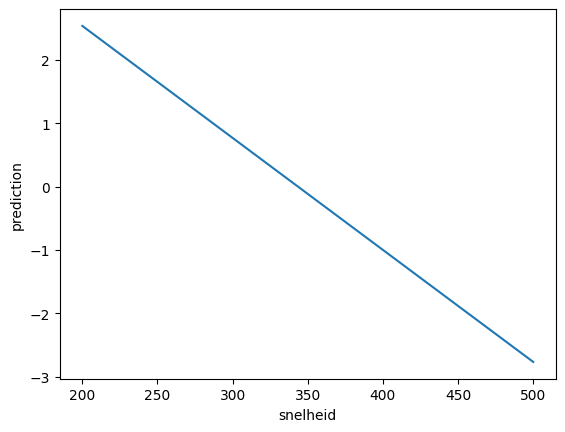

In [158]:
sns.lineplot(x='snelheid', y='prediction', data=lin_data, errorbar=('ci', 0.95))